In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

Part 1: Data Loading and Preprocessing

1. **Load the Dataset**

In [ ]:
df = pd.read_csv('onlinefoods.csv')

2. **Handle Missing values**

In [ ]:
missing_values = df.isnull().sum()

3. **Encode Categorical Variables**

In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies['Feedback'] = (df['Family size'] > 1).astype(int)

4. **Feature Selection**

In [ ]:
X = df_dummies.drop(['latitude','longitude','Pin code','Feedback'], axis=1)
y = df_dummies['Feedback']

**Part 2: Exploratory Data Analysis (EDA)**

**1. Descriptive Statistics**

In [ ]:
X.describe()

,Age,Family size,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Positive,Unnamed: 12_Yes
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,0.572165,0.030928,0.690722,0.023196,0.139175,0.533505,0.177835,0.064433,0.159794,0.481959,0.059278,0.448454,0.030928,0.005155,0.775773,0.817010,0.775773
std,2.975593,1.351025,0.495404,0.173346,0.462793,0.150720,0.346576,0.499520,0.382868,0.245840,0.366888,0.500320,0.236450,0.497978,0.173346,0.071703,0.417611,0.387157,0.417611
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,24.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,26.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,33.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2. **Visualizations**

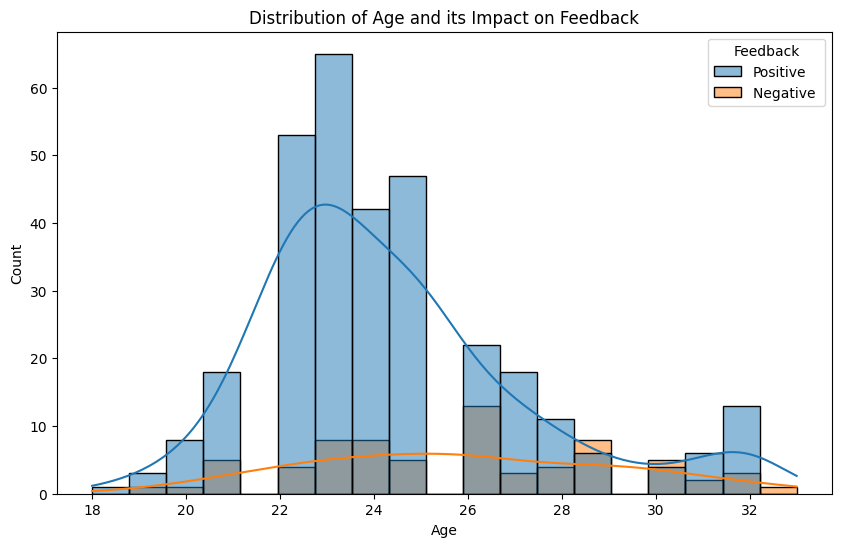

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=df, hue='Feedback', kde=True)
plt.title("Distribution of Age and its Impact on Feedback")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Part 3: Logistic Regression Model

1. **Build the Model:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

2. **Model Evaluation**



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Model Evaluation:
Accuracy: 1.0

Confusion Matrix:
[[ 2  0]
 [ 0 76]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        76

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



Part 4: Data Analysis and Visualization

1. Feature Importance:

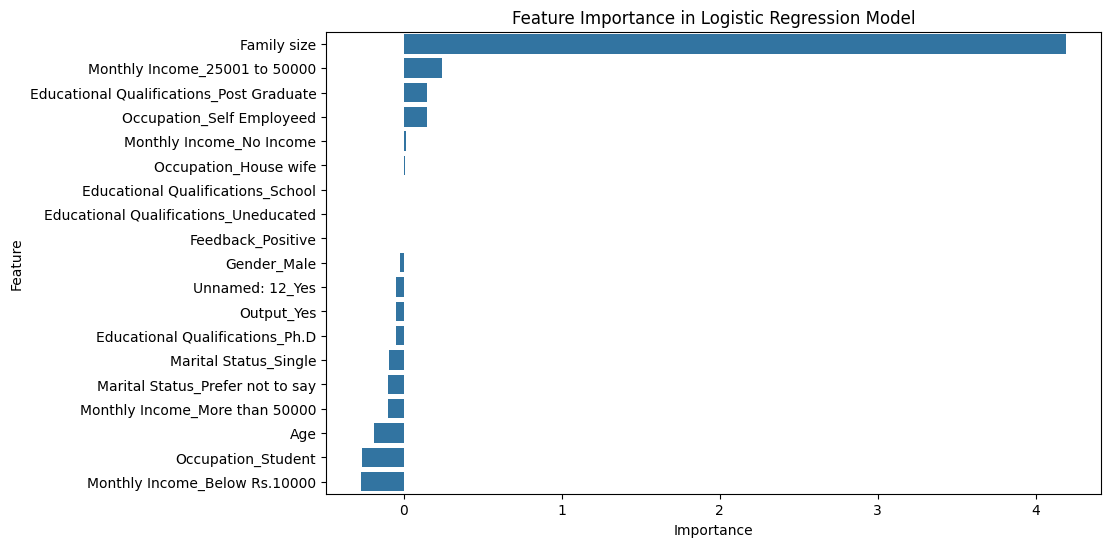

In [ ]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance in Logistic Regression Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


2. Prediction Insights:

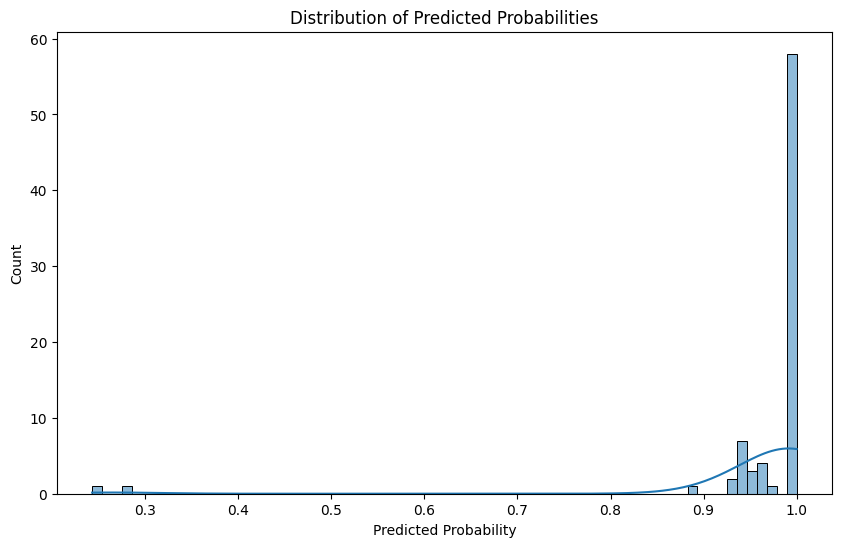

In [ ]:
 y_probs = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(y_probs, kde=True)
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.show()